In [33]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [36]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-36.818012543284205 -129.37895348991324
-30.445009579388774 -95.12447486123925
-37.197829558870914 83.33796976493636
-44.612218922264475 -72.3595732256994
-73.28761377667085 -19.167482153667095
-79.21451379293538 -147.06566304393505
6.076299196243113 -60.68766230006209
-39.94060654171286 28.83090466902854
-18.34311991312579 -67.51493903833858
-33.928327922570624 -46.994854085508564
42.68230181334155 21.110387302728697
-58.65564675656713 81.10402930405729
-41.44951648541214 -137.87867210315173
56.58400062561424 -57.68828887750399
-9.145599098897463 100.43756726889507
34.48997573597286 -155.5139828952292
-64.6934399614218 -133.8136486960457
-5.031195395736532 54.88466588647893
-22.94402053923426 138.11054285281807
11.523231358315613 30.0584098153235
-52.387951280749206 15.460951876231888
-38.1967895374113 -155.86644660700605
48.039158312433756 -76.98534300552186
71.31321405786119 86.40578335198023
42.17881592551652 48.52852287416087
-21.75497369766424 -112.31243849869573
-60.875480744994

64.56978628794556 12.78554892519503
-53.59513060791216 -72.11766368440843
-40.13168263964926 -9.952094268319172
-37.691151773202726 -65.29903818024725
5.512586201347702 88.97914719403587
37.29195727343648 98.81669379183052
25.290620195983863 -109.49932354729629
-46.46457320549461 45.47997558615839
85.04296547485629 -85.3091753995397
-66.6331413752021 -68.10398155961619
-7.941651679719655 17.35538659107391
-63.785099803816934 176.2575706491711
13.38138829862774 -66.87872258842837
-65.78494245441256 36.677891721034854
16.402699546079987 25.370676270820667
6.628617330611959 -87.40142130358318
48.75367537996814 -116.62946161798874
-39.88058183258578 -93.610969685304
1.9492014166226426 111.62055965821764
8.487545112385021 102.70911738956687
-13.576525088629168 -130.35727033011136
-76.88130454976714 -140.8913227034979
-1.111679194086662 77.40076198758015
53.15414923135981 88.46363779638034
-67.99053566508904 -111.36627997214184
-56.85915761151181 -120.89620938705914
76.5422971936662 63.31894

In [37]:
from citipy import citipy

In [38]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

601

In [39]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key



In [40]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [41]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1


# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | bartica
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | oruro
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | kosovo polje
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | kaduqli
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | senneterre
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | derbent
Processing Record 23 of Set 1 | s

Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | bam
Processing Record 42 of Set 4 | poya
Processing Record 43 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 44 of Set 4 | korla
Processing Record 45 of Set 4 | nabire
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | mount gambier
Processing Record 50 of Set 4 | krasnyy luch
Processing Record 1 of Set 5 | sabang
Processing Record 2 of Set 5 | pijijiapan
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | olafsvik
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 of Set 5 | kilindoni
Processing Record 10 of Set 5 | meyungs
City not found. Skipping...
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 31 of Set 8 | labrea
Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | iberia
Processing Record 34 of Set 8 | mahibadhoo
Processing Record 35 of Set 8 | panguna
Processing Record 36 of Set 8 | batsfjord
Processing Record 37 of Set 8 | terney
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | trinidad
Processing Record 40 of Set 8 | tarbagatay
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | russell
Processing Record 43 of Set 8 | altamont
Processing Record 44 of Set 8 | port blair
Processing Record 45 of Set 8 | kotelnikovo
Processing Record 46 of Set 8 | los llanos de aridane
Processing Record 47 of Set 8 | butaritari
Processing Record 48 of Set 8 | esperance
Processing Record 49 of Set 8 | talnakh
Processing Record 50 of Set 8 | tautira
Processing Record 1 of Set 9 | sao francisco
Proce

Processing Record 17 of Set 12 | englewood
Processing Record 18 of Set 12 | babanusah
City not found. Skipping...
Processing Record 19 of Set 12 | muli
Processing Record 20 of Set 12 | temryuk
Processing Record 21 of Set 12 | zemio
Processing Record 22 of Set 12 | asfi
Processing Record 23 of Set 12 | akyab
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | fairbanks
Processing Record 26 of Set 12 | myitkyina
Processing Record 27 of Set 12 | peace river
Processing Record 28 of Set 12 | saint-joseph
Processing Record 29 of Set 12 | burnie
Processing Record 30 of Set 12 | isangel
Processing Record 31 of Set 12 | pierre
Processing Record 32 of Set 12 | port hawkesbury
Processing Record 33 of Set 12 | shubarkuduk
Processing Record 34 of Set 12 | warragul
Processing Record 35 of Set 12 | sao filipe
Processing Record 36 of Set 12 | novyy urengoy
Processing Record 37 of Set 12 | bukachacha
Processing Record 38 of Set 12 | haibowan
City not found. Skipping...
Processing Rec

In [43]:
print(len(city_data))

555


In [44]:

# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.54,81,6,20.42,PF,2022-05-11 19:48:21
1,Lebu,-37.6167,-73.6500,57.02,69,100,4.29,CL,2022-05-11 19:46:59
2,Bambous Virieux,-20.3428,57.7575,75.45,88,40,4.61,MU,2022-05-11 19:49:29
3,Coihaique,-45.5752,-72.0662,47.01,76,0,0.00,CL,2022-05-11 19:49:08
4,Mar Del Plata,-38.0023,-57.5575,57.22,74,0,12.66,AR,2022-05-11 19:49:30
5,Mataura,-46.1927,168.8643,51.48,94,12,2.93,NZ,2022-05-11 19:49:30
6,Bartica,6.4000,-58.6167,89.92,65,90,5.53,GY,2022-05-11 19:49:31
7,Port Alfred,-33.5906,26.8910,61.61,77,0,9.19,ZA,2022-05-11 19:49:31
8,Oruro,-17.9833,-67.1500,61.29,27,20,6.91,BO,2022-05-11 19:49:31
9,Cidreira,-30.1811,-50.2056,63.72,77,44,14.83,BR,2022-05-11 19:49:32


In [45]:
new_column_order =['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-11 19:48:21,-23.1203,-134.9692,77.54,81,6,20.42
1,Lebu,CL,2022-05-11 19:46:59,-37.6167,-73.6500,57.02,69,100,4.29
2,Bambous Virieux,MU,2022-05-11 19:49:29,-20.3428,57.7575,75.45,88,40,4.61
3,Coihaique,CL,2022-05-11 19:49:08,-45.5752,-72.0662,47.01,76,0,0.00
4,Mar Del Plata,AR,2022-05-11 19:49:30,-38.0023,-57.5575,57.22,74,0,12.66
5,Mataura,NZ,2022-05-11 19:49:30,-46.1927,168.8643,51.48,94,12,2.93
6,Bartica,GY,2022-05-11 19:49:31,6.4000,-58.6167,89.92,65,90,5.53
7,Port Alfred,ZA,2022-05-11 19:49:31,-33.5906,26.8910,61.61,77,0,9.19
8,Oruro,BO,2022-05-11 19:49:31,-17.9833,-67.1500,61.29,27,20,6.91
9,Cidreira,BR,2022-05-11 19:49:32,-30.1811,-50.2056,63.72,77,44,14.83


In [46]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

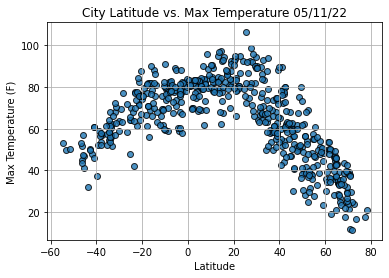

In [48]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

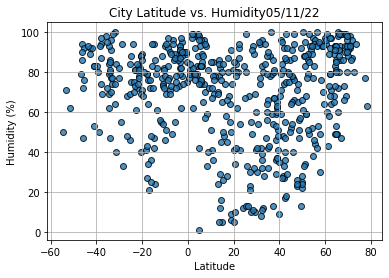

In [49]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()


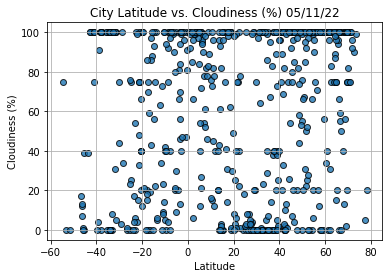

In [50]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

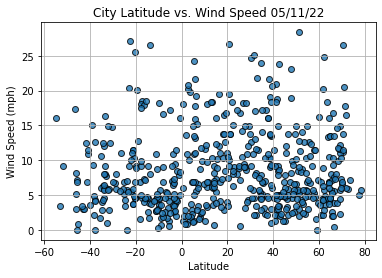

In [51]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [52]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

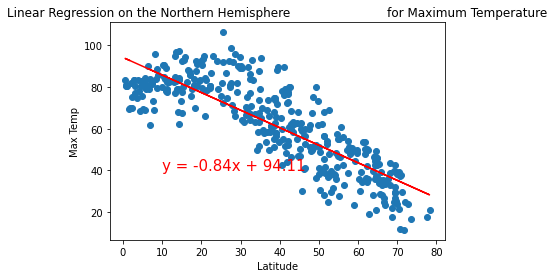

In [54]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

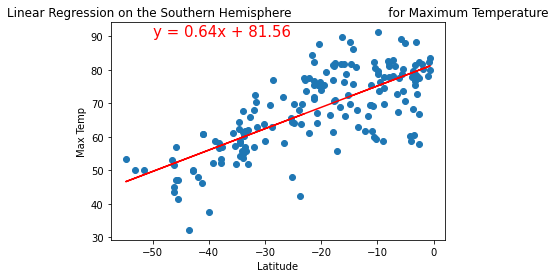

In [55]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

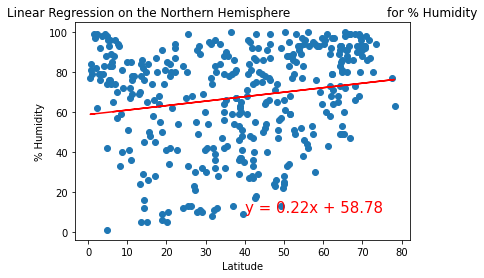

In [56]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

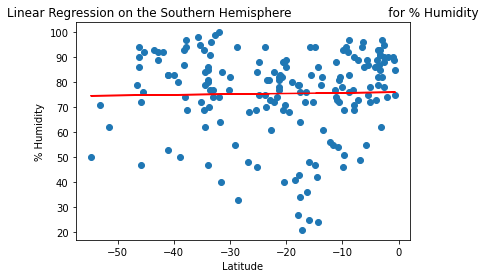

In [57]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

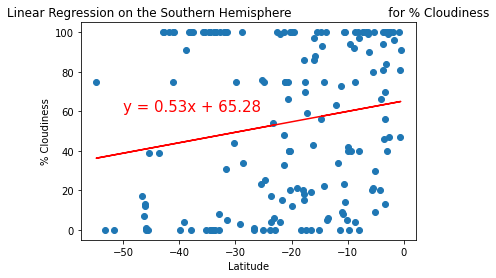

In [58]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

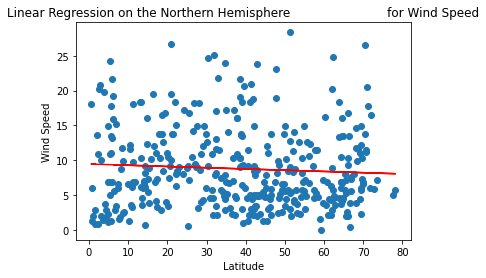

In [59]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

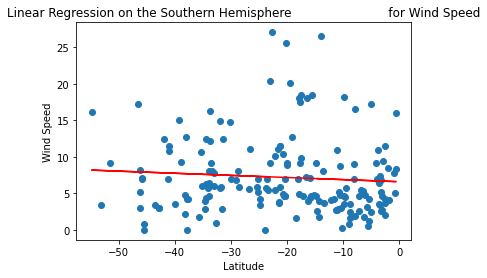

In [60]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [61]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 77
What is the maximum temperature you would like for your trip? 90


In [62]:
# Filter the dataset to find the cities that fit the criteria.

preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-11 19:48:21,-23.1203,-134.9692,77.54,81,6,20.42
6,Bartica,GY,2022-05-11 19:49:31,6.4000,-58.6167,89.92,65,90,5.53
13,Bengkulu,ID,2022-05-11 19:49:34,-3.8004,102.2655,77.83,89,81,10.89
14,Kapaa,US,2022-05-11 19:49:34,22.0752,-159.3190,80.58,80,75,18.41
15,Victoria,HK,2022-05-11 19:48:40,22.2855,114.1577,80.65,92,100,15.01
17,Kaduqli,SD,2022-05-11 19:49:35,11.0167,29.7167,89.19,36,96,3.24
27,Papetoai,PF,2022-05-11 19:49:38,-17.4961,-149.8729,81.99,76,0,18.50
28,Puerto Ayora,EC,2022-05-11 19:49:38,-0.7393,-90.3518,82.36,89,47,5.01
29,Atuona,PF,2022-05-11 19:49:39,-9.8000,-139.0333,78.78,69,0,18.21
36,Vallenar,CL,2022-05-11 19:49:42,-28.5708,-70.7581,77.02,33,34,5.82


In [63]:
preferred_cities_df.count()


City          153
Country       153
Date          153
Lat           153
Lng           153
Max Temp      153
Humidity      153
Cloudiness    153
Wind Speed    153
dtype: int64

In [64]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.

hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()

hotel_df["Hotel Name"] = ""

hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Rikitea,PF,77.54,-23.1203,-134.9692,
6,Bartica,GY,89.92,6.4000,-58.6167,
13,Bengkulu,ID,77.83,-3.8004,102.2655,
14,Kapaa,US,80.58,22.0752,-159.3190,
15,Victoria,HK,80.65,22.2855,114.1577,
17,Kaduqli,SD,89.19,11.0167,29.7167,
27,Papetoai,PF,81.99,-17.4961,-149.8729,
28,Puerto Ayora,EC,82.36,-0.7393,-90.3518,
29,Atuona,PF,78.78,-9.8000,-139.0333,
36,Vallenar,CL,77.02,-28.5708,-70.7581,


In [65]:
# Set parameters to search for a hotel.

params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]

NameError: name 'g_key' is not defined